In [45]:
import arrow
import requests

# Using Storm Glass API to extract weather data
start = arrow.get('2020-06-14')
end = arrow.get('2020-06-18')
print(start)

response = requests.get(
  'https://api.stormglass.io/v2/weather/point',
  params={
    'lat': 19.9975,
    'lng': 73.7898,
    'params': ','.join(['pressure','cloudCover','humidity','windSpeed']),
    'start': start,
    'end': end,
    'source': 'noaa'
  },
  headers={
    'Authorization': 'e87fddd8-4165-11ed-a3a1-0242ac130002-e87fde32-4165-11ed-a3a1-0242ac130002'
  }
)

#Plant 1: 14.91719, 78.21319
#Plant 2: 19.9975, 73.7898

# Do something with response data.
json_data = response.json()

2020-06-14T00:00:00+00:00


In [46]:
print(json_data)

{'hours': [{'cloudCover': {'noaa': 100.0}, 'humidity': {'noaa': 88.6}, 'pressure': {'noaa': 1002.22}, 'time': '2020-06-14T00:00:00+00:00', 'windSpeed': {'noaa': 3.43}}, {'cloudCover': {'noaa': 100.0}, 'humidity': {'noaa': 87.83}, 'pressure': {'noaa': 1002.81}, 'time': '2020-06-14T01:00:00+00:00', 'windSpeed': {'noaa': 3.3}}, {'cloudCover': {'noaa': 100.0}, 'humidity': {'noaa': 87.07}, 'pressure': {'noaa': 1003.39}, 'time': '2020-06-14T02:00:00+00:00', 'windSpeed': {'noaa': 3.17}}, {'cloudCover': {'noaa': 100.0}, 'humidity': {'noaa': 86.3}, 'pressure': {'noaa': 1003.98}, 'time': '2020-06-14T03:00:00+00:00', 'windSpeed': {'noaa': 3.04}}, {'cloudCover': {'noaa': 100.0}, 'humidity': {'noaa': 84.33}, 'pressure': {'noaa': 1004.02}, 'time': '2020-06-14T04:00:00+00:00', 'windSpeed': {'noaa': 3.08}}, {'cloudCover': {'noaa': 100.0}, 'humidity': {'noaa': 82.37}, 'pressure': {'noaa': 1004.07}, 'time': '2020-06-14T05:00:00+00:00', 'windSpeed': {'noaa': 3.11}}, {'cloudCover': {'noaa': 100.0}, 'humid

In [49]:
import json
with open('plant2datav4.json', 'w', encoding='utf-8') as f:
    json.dump(json_data, f, ensure_ascii=False, indent=4)

In [50]:
import pandas as pd
import openpyxl

data = json.load(open('plant2datav4.json'))
new_dict = {}
for item in data['hours']:
    time = item.pop('time')
    new_dict[time] = item
{k:dict([next(iter(v.items()))]) for k, v in new_dict.items()}

# Cleaning json data 
values = list(new_dict.values())
d = {}
for k in values[0].keys():
    d[k] = tuple(d[k] for d in values)
print(d)

df = pd.DataFrame(d)
df.to_excel('plant2datav4.xlsx')

{'cloudCover': ({'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 99.0}, {'noaa': 98.0}, {'noaa': 97.0}, {'noaa': 96.0}, {'noaa': 95.0}, {'noaa': 94.0}, {'noaa': 95.0}, {'noaa': 96.0}, {'noaa': 97.0}, {'noaa': 98.0}, {'noaa': 99.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 100.0}, {'noaa': 92.5}, {'noaa': 85.0}, {'noaa': 77.5}, {'noaa': 70.0}, {'noaa': 62.5}, {'noaa': 55.0}, {'noaa': 61.67}, {'noaa': 68.33}, {'noaa': 75.0}, {'noaa': 81.67},

In [79]:
import torch
from torch import nn
import torch.utils.data as data_utils
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
torch.set_printoptions(sci_mode=False)

In [226]:
#Creating tensors of input and output data (and normalizing)
data = pd.read_csv('data.csv')
input_tensor = torch.tensor(data.iloc[:,6:12].values)
print(input_tensor)
input_tensor = F.normalize(input_tensor, dim=-1)
print(input_tensor)
output_tensor = torch.tensor(data.iloc[:,5].values)
output_tensor = F.normalize(output_tensor, dim=-1)
print(output_tensor)

#Load data
train_input, test_input = torch.split(input_tensor,5716)
train_output, test_output = torch.split(output_tensor,5716)
train_tensor = data_utils.TensorDataset(train_input, train_output)
train_loader = data_utils.DataLoader(train_tensor, batch_size = batch_size, shuffle=True)
test_tensor = data_utils.TensorDataset(test_input, test_output)
test_loader = data_utils.DataLoader(test_tensor, batch_size=batch_size, shuffle=False)

tensor([[  25.1843,   22.8575,   48.0000,   41.7000, 1005.6400,    2.4800],
        [  25.0846,   22.7617,   48.0000,   41.7000, 1005.6400,    2.4800],
        [  24.9358,   22.5923,   48.0000,   41.7000, 1005.6400,    2.4800],
        ...,
        [  23.3547,   22.4922,   99.8300,   91.8000, 1002.1400,    3.9200],
        [  23.2910,   22.3739,   99.8300,   91.8000, 1002.1400,    3.9200],
        [  23.2029,   22.5359,   99.8300,   91.8000, 1002.1400,    3.9200]],
       dtype=torch.float64)
tensor([[0.0250, 0.0227, 0.0476, 0.0414, 0.9974, 0.0025],
        [0.0249, 0.0226, 0.0476, 0.0414, 0.9974, 0.0025],
        [0.0247, 0.0224, 0.0476, 0.0414, 0.9974, 0.0025],
        ...,
        [0.0231, 0.0222, 0.0987, 0.0907, 0.9905, 0.0039],
        [0.0230, 0.0221, 0.0987, 0.0907, 0.9905, 0.0039],
        [0.0229, 0.0223, 0.0987, 0.0907, 0.9905, 0.0039]], dtype=torch.float64)
tensor([0., 0., 0.,  ..., 0., 0., 0.], dtype=torch.float64)


In [245]:
#Neural network parameters
input_size = 6
hidden_size = 100
output_size = 1
num_epochs = 10
batch_size = 100
learning_rate = 0.01
device = 'cpu'

In [233]:
class neural_network(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(neural_network, self).__init__()
        self.gen = nn.Sequential(
            self.create_gen_block(input_size, hidden_size),
            #self.create_gen_block(hidden_size, hidden_size*3),
            #self.create_gen_block(hidden_size*3, hidden_size*5),
            #self.create_gen_block(hidden_size*5, hidden_size),
            nn.Linear(hidden_size, output_size)
        )
        
    def create_gen_block(self, input_size, output_size):
       
        return nn.Sequential(
            nn.Linear(input_size, output_size),
            nn.BatchNorm1d(output_size),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, parameters):
        return self.gen(parameters)

model = neural_network(input_size, hidden_size, output_size).to(device)
    
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

n_total_steps = len(train_loader)

In [251]:
#Training
for epoch in range(num_epochs):
    for i, (parameters, power) in enumerate(train_loader):
        parameters = parameters.to(device)
        power = power.to(device)
        outputs = model.double()(parameters)
        loss = torch.sqrt(criterion(outputs, power))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i == 5:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}') 
        
    

Epoch [1/10], Step[6/58], Loss: 0.0108
Epoch [2/10], Step[6/58], Loss: 0.0112
Epoch [3/10], Step[6/58], Loss: 0.0114
Epoch [4/10], Step[6/58], Loss: 0.0098
Epoch [5/10], Step[6/58], Loss: 0.0096
Epoch [6/10], Step[6/58], Loss: 0.0094
Epoch [7/10], Step[6/58], Loss: 0.0102
Epoch [8/10], Step[6/58], Loss: 0.0108
Epoch [9/10], Step[6/58], Loss: 0.0099
Epoch [10/10], Step[6/58], Loss: 0.0114


In [252]:
#Testing
with torch.no_grad():
    for parameters, power in test_loader:
        parameters = parameters.to(device)
        power = power.to(device)
        outputs = model.double()(parameters)
        print(f'Guesses: {outputs[0]}, Actual: {power[0]}')
    

Guesses: tensor([0.0107], dtype=torch.float64), Actual: 0.0019443242740559107
Guesses: tensor([0.0107], dtype=torch.float64), Actual: 0.0015243657572676607
Guesses: tensor([0.0107], dtype=torch.float64), Actual: 0.0
Guesses: tensor([0.0107], dtype=torch.float64), Actual: 0.0
Guesses: tensor([0.0107], dtype=torch.float64), Actual: 0.0
Guesses: tensor([0.0107], dtype=torch.float64), Actual: 0.0
Guesses: tensor([0.0107], dtype=torch.float64), Actual: 0.0


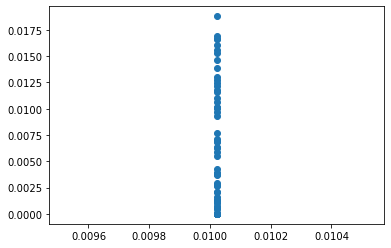

In [249]:
plt.scatter(outputs, power)